In [30]:
# 파일을 읽기 모드로 열기
f = open(r"C:\Users\kgm97\Desktop\linear_classification.txt", 'r')

# 데이터를 저장할 리스트 초기화
index = []
capacity_of_s = []
capacity_of_t = []
labels = []

# 파일의 각 줄을 읽어서 데이터를 저장
for line in f.readlines():
    linear_classification = line.strip().split()  
    index.append(linear_classification[0])
    capacity_of_s.append(float(linear_classification[1]))
    capacity_of_t.append(float(linear_classification[2]))
    labels.append(int(linear_classification[3]))

# 파일 닫기
f.close()

# 데이터 출력
for i in range(len(index)):
    result = "성공" if labels[i] == 1 else "실패"
    print(f"{index[i]}, 용액S {capacity_of_s[i]}ml, 용액T {capacity_of_t[i]}ml, {result} ")


A, 용액S 35.0ml, 용액T 27.0ml, 성공 
B, 용액S 81.0ml, 용액T 8.0ml, 실패 
C, 용액S 16.0ml, 용액T 38.0ml, 성공 
D, 용액S 28.0ml, 용액T 42.0ml, 성공 
E, 용액S 72.0ml, 용액T 20.0ml, 실패 
F, 용액S 64.0ml, 용액T 43.0ml, 실패 
G, 용액S 29.0ml, 용액T 13.0ml, 성공 
H, 용액S 41.0ml, 용액T 22.0ml, 실패 
I, 용액S 32.0ml, 용액T 51.0ml, 실패 
J, 용액S 15.0ml, 용액T 36.0ml, 성공 


In [31]:
import numpy as np

# 데이터 리스트를 NumPy 배열로 변환
X = np.array([capacity_of_s, capacity_of_t]).T
y = np.array(labels)

# Linear Classification 계산
A = np.column_stack((X, np.ones(X.shape[0])))
a = np.linalg.lstsq(A, y, rcond=None)[0]

# 결과 출력
print(f"Linear Classification : y = {a[0]:.5f} * S + {a[1]:.5f} * T + {a[2]:.5f}")


Linear Classification : y = -0.04179 * S + -0.02514 * T + 2.48030


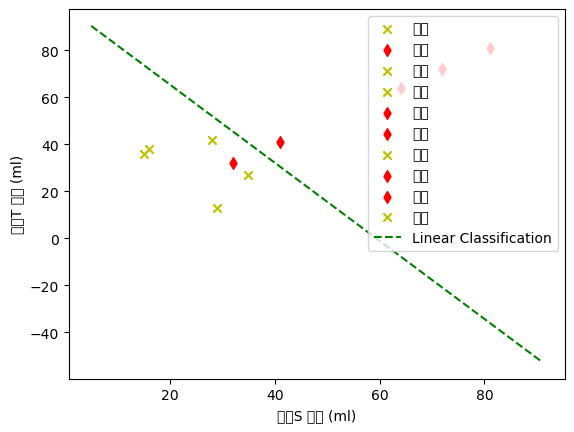

In [46]:
import matplotlib.pyplot as plt

# 데이터 시각화
for i in range(len(capacity_of_s)):
    if labels[i] == 1:
        plt.scatter(capacity_of_s[i], capacity_of_t[i], marker='x', color='y',label='성공')
    else:
        plt.scatter(capacity_of_s[i], capacity_of_s[i], marker='d', color='r',label='실패')

# 분류 경계선 시각화
y_values = (-a[0] * x_values - a[2]) / a[1]
x_values = np.linspace(min(capacity_of_s) - 10, max(capacity_of_s) + 10, 100)
plt.plot(x_values, y_values, 'g--', label='Linear Classification')

plt.xlabel('용액S 용량 (ml)')
plt.ylabel('용액T 용량 (ml)')
plt.legend()
plt.show()


In [62]:
s = 47
t = 29

# 예측값 계산
predicted = a[0] * s + a[1] * t+ a[2]

# 예측 결과 출력
if predicted > 0:
    test_result = "실패"
else:
    test_result = "성공"

print(f"입력한 실험은 학습 모델에 의해 실험 {result}으로 판단됩니다.")


입력한 실험은 학습 모델에 의해 실험 성공으로 판단됩니다.
